# K-Means Clustering

- machine learning algorithm for data clustering or data segmentation

# K-Means - via Scikit

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

K-Means
- searches for a pre-determined number of clusters
- within an unlabeled multidimensional dataset
(unsupervised learning)

Optimal Clustering Criteria

- "Cluster Center" : arithmetic mean of all points belonging to cluster
- Each point is closer to its own cluster center than to other cluster centers



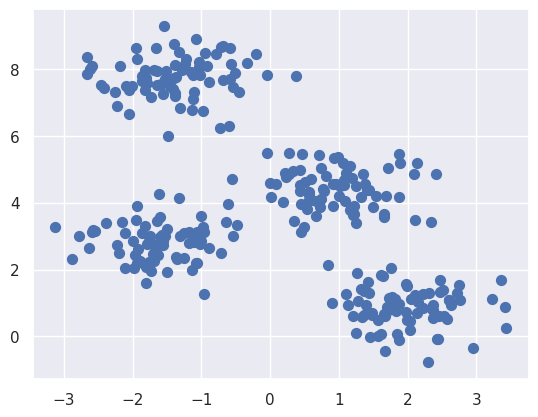

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



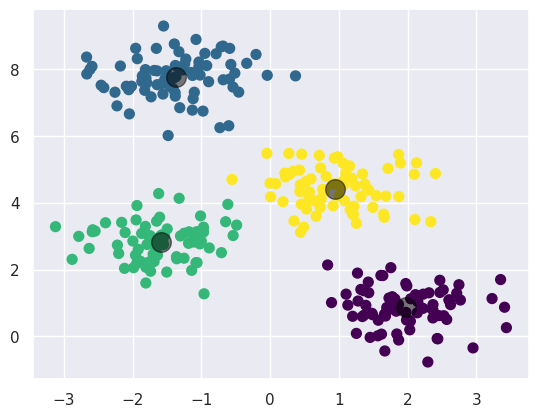

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

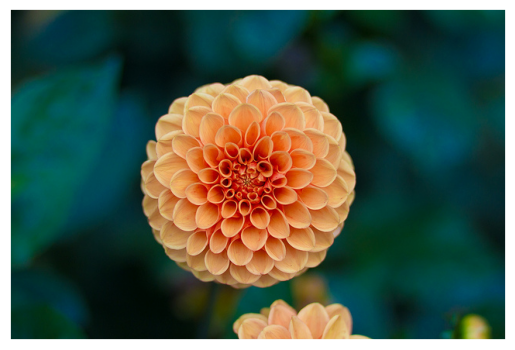

In [ ]:
from sklearn.datasets import load_sample_image

image = load_sample_image('flower.jpg')

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [ ]:
image.shape

(427, 640, 3)

In [ ]:
image

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [ ]:
image_data = image / 255.0  # change 0..1 scale
image_data = image_data.reshape(427 * 640, 3)
image_data.shape

(273280, 3)

In [ ]:
# Visualize pixels in color space
# Use subset 0f 10,000 pixels (for efficiency)

def plot_pixels(image_data, title, colors=None, N=10000):
    if colors is None:
        colors = image_data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(image_data.shape[0])[:N]
    colors = colors[i]
    R, G, B = image_data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

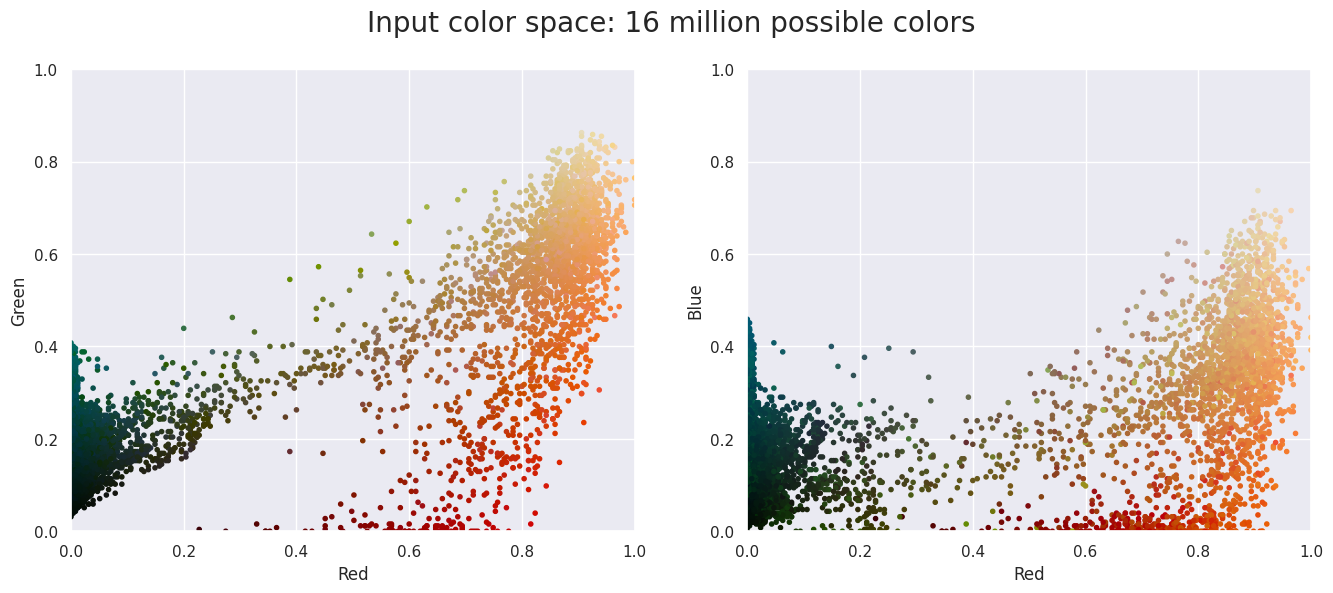

In [ ]:
plot_pixels(image_data, 'Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



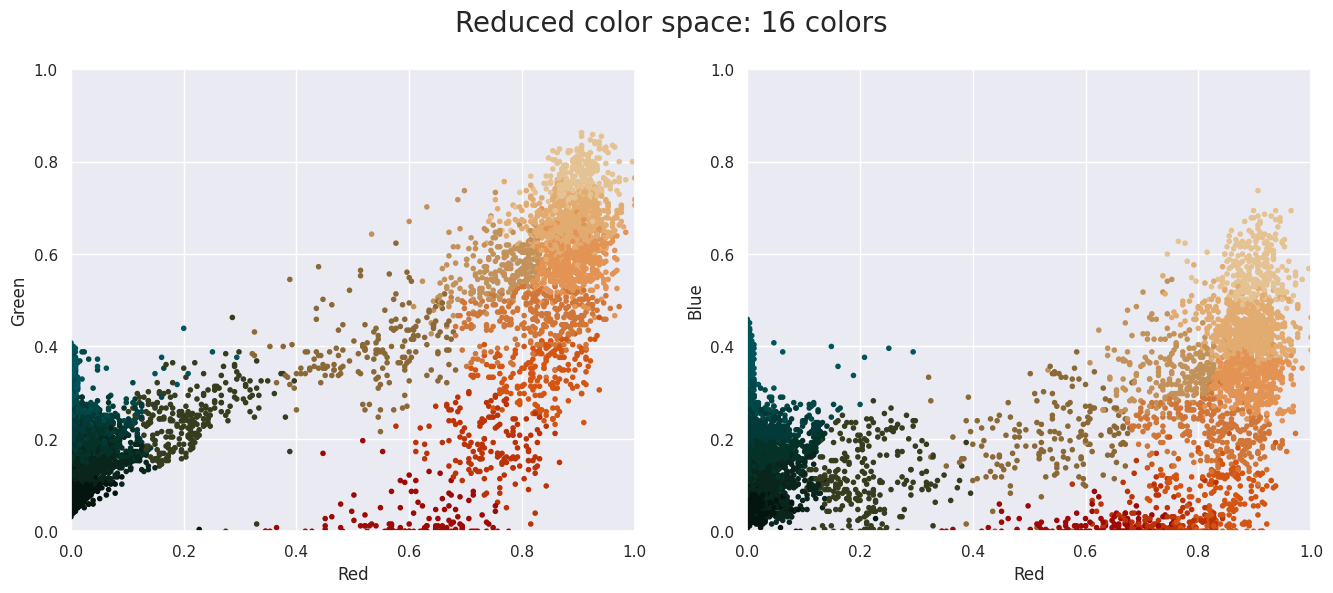

In [ ]:
from sklearn.cluster import MiniBatchKMeans
# get mini batch (subset) of data for faster processing

kmeans = MiniBatchKMeans(16)
kmeans.fit(image_data)
new_colors = kmeans.cluster_centers_[kmeans.predict(image_data)]

plot_pixels(image_data, colors=new_colors, title="Reduced color space: 16 colors")

In [ ]:
new_colors.shape

(273280, 3)

In [ ]:
image_recolored = new_colors.reshape(image.shape)
# reshape back to original image shape

print('Dimensions : ', image_recolored.shape)
print(image_recolored)

Dimensions :  (427, 640, 3)
[[[0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  ...
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]]

 [[0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  ...
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]]

 [[0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  [0.01384444 0.07652256 0.05305496]
  ...
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]
  [0.00471774 0.28058608 0.2762514 ]]

 ...

 [[0.01836937 0.19433907 0.15453939]
  [0.01836937 0.19433907 0.15453939]
  [0.01836937 0.19433907 0.15453939]
  ...
  [0.03438868 0.14414755 0.10980458]
  [0.03438868 0.14414755 0.10980458]
  [0.03438868 0.14414755 0.10980458]]

 [[0.01836937 0.19433907 0.15453939]
  [0.0183

Text(0.5, 1.0, '16-color Image')

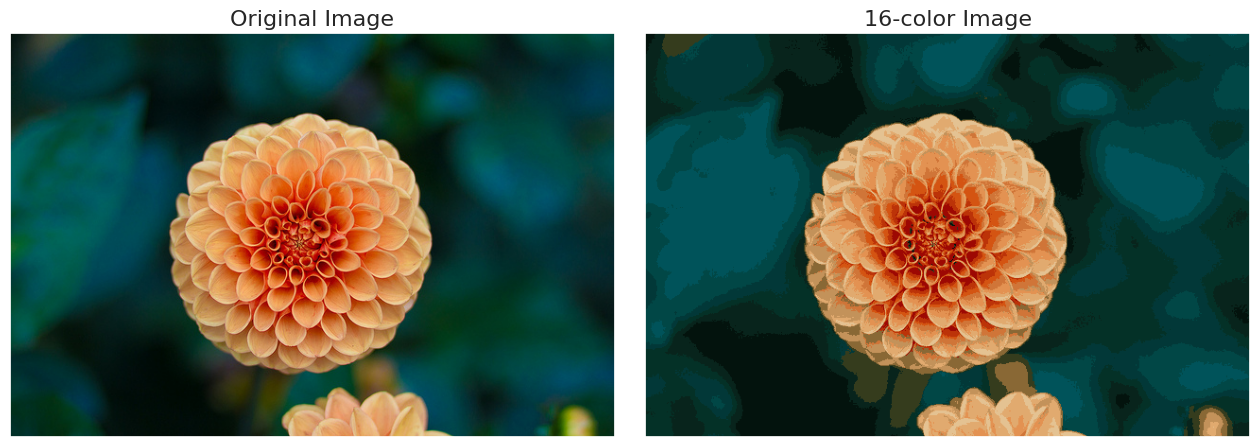

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,6),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16)

# Generating Color Palette

In [ ]:
!pip install -U pandas
import pandas as pd

In [ ]:
np.array(image)

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [ ]:
# check if colors have 3 channels (RGB)
n_dims = np.array(image).shape[-1]
n_dims

3

In [ ]:
# gather r, g, b values
r, g, b = np.array(image).reshape(-1, n_dims).T
print(r, g, b)

[2 3 7 ... 7 8 9] [19 18 20 ... 46 45 43] [13 13 13 ... 28 28 27]


In [ ]:
# store values in data frame / table
df_rgb = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)
df_rgb

,R,G,B
223448,4,21,11
152343,0,92,91
149397,199,3,5
211995,3,16,9
13920,2,45,26
...,...,...,...
269926,7,60,54
221176,75,74,26
86490,1,91,99
52493,12,39,30


In [ ]:
palette_size = 6

In [ ]:
kmeans_model = KMeans(n_clusters = palette_size,
                      random_state=0,
                      init="k-means++",
                      n_init="auto").fit(df_rgb)

In [ ]:
kmeans_model.cluster_centers_.astype(int).tolist()

[[159, 13, 3],
 [2, 69, 70],
 [227, 176, 124],
 [8, 38, 28],
 [214, 142, 79],
 [184, 97, 36]]

In [ ]:
palette = kmeans_model.cluster_centers_.astype(int).tolist()
palette

[[159, 13, 3],
 [2, 69, 70],
 [227, 176, 124],
 [8, 38, 28],
 [214, 142, 79],
 [184, 97, 36]]

In [ ]:
import seaborn as sns
import colorsys

Sort RGB values based on ascending order
- refer to their converted HSV values
- first element of each tuple in sorted list will have lowest HSV value

NOTE. Optional Step -- done for better viewing purposes

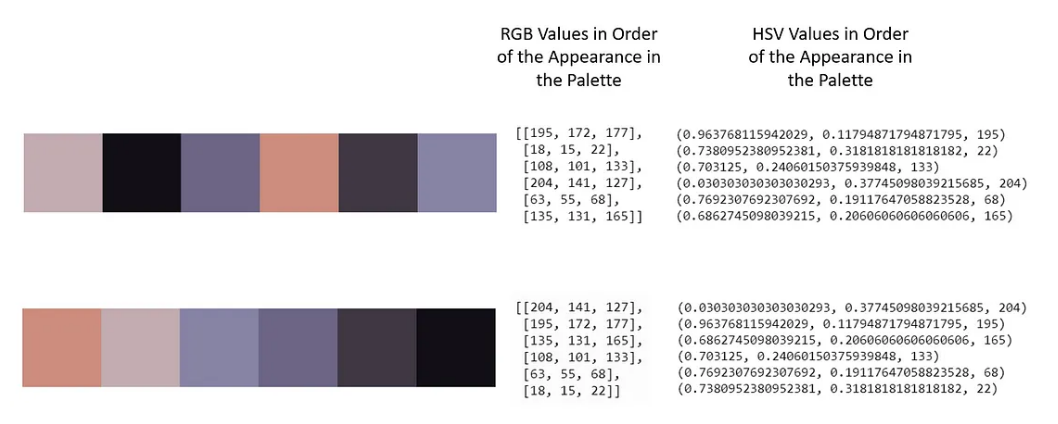

In [ ]:
palette.sort(key=lambda rgb: (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))(*rgb))
# sort RGB tuples in palette based on their HSV values
# note. list orderd by Value (i.e. brightness or intensity of color)
#       from 0 to 100 : 0 == black, 100 == brightest/most color

In [ ]:
palette

[[159, 13, 3],
 [184, 97, 36],
 [214, 142, 79],
 [227, 176, 124],
 [8, 38, 28],
 [2, 69, 70]]

# Visualize palette via Plotly Express

In [ ]:
import plotly.express as px

In [ ]:
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

# Visualize palette via Seaborn

In [ ]:
# Convert RGB to HEX

def rgb_to_hex(r, g, b):
  return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [ ]:
list_hex = []

for each_rgb_col in palette:
  list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))

list_hex

['#9f0d03', '#b86124', '#d68e4f', '#e3b07c', '#08261c', '#024546']

In [ ]:
sns.set_palette(list_hex)

In [ ]:
sns.color_palette()

[(0.6235294117647059, 0.050980392156862744, 0.011764705882352941),
 (0.7215686274509804, 0.3803921568627451, 0.1411764705882353),
 (0.8392156862745098, 0.5568627450980392, 0.30980392156862746),
 (0.8901960784313725, 0.6901960784313725, 0.48627450980392156),
 (0.03137254901960784, 0.14901960784313725, 0.10980392156862745),
 (0.00784313725490196, 0.27058823529411763, 0.27450980392156865)]

[(0.6235294117647059, 0.050980392156862744, 0.011764705882352941),
 (0.7215686274509804, 0.3803921568627451, 0.1411764705882353),
 (0.8392156862745098, 0.5568627450980392, 0.30980392156862746),
 (0.8901960784313725, 0.6901960784313725, 0.48627450980392156),
 (0.03137254901960784, 0.14901960784313725, 0.10980392156862745),
 (0.00784313725490196, 0.27058823529411763, 0.27450980392156865)]

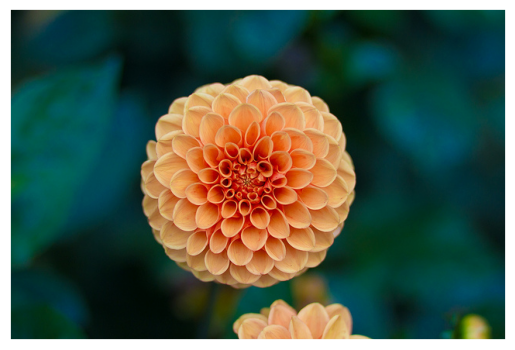

In [ ]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

sns.color_palette(list_hex)

## with HEX labels

In [ ]:
list_hex

['#9f0d03', '#b86124', '#d68e4f', '#e3b07c', '#08261c', '#024546']

Using Seaborn

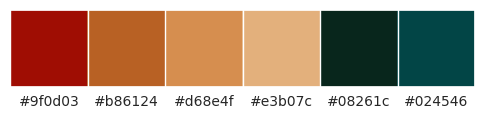

In [ ]:
sns.palplot(list_hex)

for i, hex_value in enumerate(list_hex):
    plt.text(i, 0.75, hex_value, fontsize=10, ha='center')

Using Plotly Express

In [ ]:
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)

In [ ]:
fig.update_layout(xaxis=dict(ticktext=list_hex, tickvals=list(range(len(list_hex)))), margin=dict(t=0, b=0, l=10, r=10))
fig.update_yaxes(visible=False)
fig.show()

# DEMO

In [ ]:
def generate_palette(image, palette_size):
  n_dims = np.array(image).shape[-1]

  r, g, b = np.array(image).reshape(-1, n_dims).T

  df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)

  kmeans_model = KMeans(n_clusters=palette_size,
                        random_state=0,
                        init="k-means++",
                        n_init="auto").fit(df)
  palette = kmeans_model.cluster_centers_.astype(int).tolist()
  palette.sort(key=lambda rgb: (lambda r, g, b: colorsys.rgb_to_hsv(r, g, b))(*rgb))
  list_hex=[]
  for each_rgb_col in palette:
    # call rgb_to_hex func
    list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))

  sns.set_palette(list_hex)
  return sns.color_palette()

Wallpaper link:
https://www.abercrombiekent.co.uk/-/media/abercrombieandkent/images/page-header-images/europe/germany/germany__0001_germany-berlin-brandenburg-gate_shutterstock_367652915.jpg?w=1920&h=940

In [ ]:
img_link = input("Image Link:")

Image Link:https://www.abercrombiekent.co.uk/-/media/abercrombieandkent/images/page-header-images/europe/germany/germany__0001_germany-berlin-brandenburg-gate_shutterstock_367652915.jpg?w=1920&h=940


In [ ]:
import requests
from io import BytesIO
from PIL import Image, ImageColor

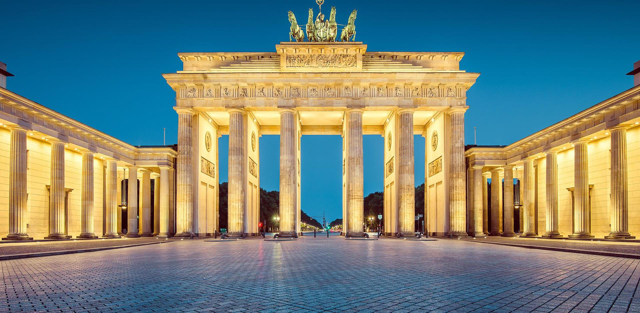

In [ ]:
response = requests.get(img_link)
img = Image.open(BytesIO(response.content))
img.resize((round(img.size[0]/3), round(img.size[1]/3))) # resize to fit here

In [ ]:
generate_palette(img, 7)

[(0.25098039215686274, 0.16470588235294117, 0.1568627450980392),
 (0.6470588235294118, 0.4823529411764706, 0.2784313725490196),
 (0.9137254901960784, 0.7686274509803922, 0.47058823529411764),
 (0.06666666666666667, 0.4980392156862745, 0.6823529411764706),
 (0.011764705882352941, 0.34901960784313724, 0.5294117647058824),
 (0.34509803921568627, 0.40784313725490196, 0.5019607843137255),
 (0.6196078431372549, 0.5568627450980392, 0.5686274509803921)]

# References

- Choosing color maps in matplotlib
https://matplotlib.org/stable/tutorials/colors/colormaps.html

- Scikit - sklearn.datasets.load_sample_image
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_image.html#sklearn.datasets.load_sample_image

- Scikit - Color Quantization using K-Means
https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

K-Means


- In-Depth: k-Means Clustering
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

- Unsupervised Learning with K-Means Clustering: Generate Color Palettes from Images
https://towardsdatascience.com/unsupervised-learning-with-k-means-clustering-generate-color-palettes-from-images-94bb8e6a1416
--> https://github.com/royn5618/Medium_Blog_Codes/blob/master/color_palette_generator/color_palette_generator.ipynb

- K-Means FROM SCRATCH
**No Scikit**
https://towardsdatascience.com/color-palette-extraction-with-k-means-clustering-machine-learning-from-scratch-part-iv-55e807407e53
--> https://colab.research.google.com/drive/1hUI2N-HvqVPzmySGXYS9mjM008EUo5pE
